## 分词

In [2]:
%cd drive/My\ Drive/疫情期间网民情绪识别

/content/drive/My Drive/疫情期间网民情绪识别


In [ ]:
!pwd

/content


### 尝试使用多种分词工具
1. `jieba`
2. `snownlp`

### 尝试使用多种计算词向量的方法
1. `GloVe`
2. `CNN`
3. 直接使用词频，`sklearn`中的`CountVectorizer`,也即词袋模型(bag of word)
4. `tf-idf`

In [3]:
import jieba
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import gensim

#### 通过`jieba.add_word('台中')`来强制加入词语

In [ ]:
# 手动加入一些词语
jieba.add_word('共抗')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.745 seconds.
Prefix dict has been built successfully.


In [ ]:
## 用于生成停用词的set

def makeStopWord():
    from os import listdir
    stopword = set()
    for file in listdir('stopwords'):
        if file.endswith("txt"):
            with open(f'stopwords/{file}') as f:
                lines = f.readlines()
                for line in lines:
                    words = jieba.lcut(line, cut_all=False)
                    for word in words:
                        stopword.add(word.strip())
    return stopword

In [ ]:
stopwords = makeStopWord()
def split_with_jieba(sentence):
    from re import match
    words = jieba.lcut(sentence, HMM=False)
    words = [x.strip() for x in words]
    # 不能在停用词中，并且去除纯数字
    return list(filter(lambda x: x not in stopwords and match("\d+$", x) == None, words))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.949 seconds.
Prefix dict has been built successfully.


In [ ]:
def cleanComment(comment):
    import re
    comment = re.sub('#.*?#', '', comment)
    comment = re.sub('//@.*?:', '', comment)
    comment = re.sub('//@.*?：', '', comment)
    comment = re.sub('//.*?:', '', comment)
    comment = re.sub('//.*?：', '', comment)
    comment = re.sub('【.*?】', '', comment)
    comment = re.sub('《.*?》', '', comment)
    comment = re.sub('//.*?//', '', comment)
    comment = re.sub('@.*?：', '', comment)
    comment = re.sub('@.*?:', '', comment)
    comment = re.sub('『.*?』', '', comment)
    comment = re.sub(r'\d', '', comment)
    return comment

In [ ]:
df = pd.concat([train_df, test_df])

In [74]:
## 载入分词好的csv文件
train_df = pd.read_csv("./train_jieba.csv")
test_df = pd.read_csv("./test_labled_jieba.csv")
train_df['jieba_cut'] = train_df["jieba_cut"].apply(eval)
test_df['jieba_cut'] = test_df["jieba_cut"].apply(eval)
df = pd.concat([train_df, test_df])
# X_train, X_validation, Y_train, Y_validation = train_test_split(df["jieba_cut"], df["情感倾向"],test_size = 0.2,stratify=df["情感倾向"], random_state=1)

In [ ]:
train_df

,微博中文内容,情感倾向,jieba_cut
0,中国加油一起加油//@企鹅倩儿:#医护后盾#致敬所有前线医护工作者和志愿者们辛苦，因为你们我...,1,"[中国, 加油, 加油, 致敬, 前线, 医护, 工作者, 志愿者, 辛苦, 平安, 加油,..."
1,决定一个人最终高度的，往往并非起点，而是拐点，机遇都在拐点！2020年是鼠年，鼠在12生肖里...,1,"[最终, 高度, 起点, 拐点, 机遇, 拐点, 年, 鼠年, 鼠, 生肖, 里, 排, 第..."
2,我们都会尊重“遍体鳞伤但仍心无恨意，笑对人生的人”。陶勇医生，加油！,1,"[尊重, 遍体鳞伤, 心, 恨意, 笑对人生, 陶, 勇, 医生, 加油]"
3,【#关注新型冠状病毒疫情#7大热点，钟南山李兰娟院士答疑】现在疫情处于什么阶段？“方舱医院”...,1,"[疫情, 处于, 阶段, 方舱, 医院, 收治, 一类, 患者, 双黄连, 热门, 药品, ..."
4,解释:病毒变成结晶在空气里，然后人or别的呼吸进去了，它就寄存在别的生物体里复制它的RNA（...,0,"[解释, 病毒, 结晶, 空气, 里, 呼吸, 寄存, 生物体, 里, 复制, RNA, 高..."
...,...,...,...
44596,#你平安回来我承包一年家务#【疫情期间如何解决焦虑情绪？】人类的悲喜不相通，焦虑却出奇一致....,-1,"[人类, 悲喜, 相通, 焦虑, 出奇, 害怕, 安静, 逃避, 独处, 陷入, 恶性循环,..."
44597,#seu通知#日前，#新型冠状病毒#感染的肺炎疫情持续蔓延，江苏省教育系统已启动突发公共卫生...,0,"[日前, 感染, 肺炎, 疫情, 持续, 蔓延, 江苏省, 教育, 系统, 启动, 突发, ..."
44598,//@新疆发布:#众志成城打赢疫情防控阻击战#众志成城防疫情，我在新疆，我承诺！#疫情防控动态#,1,"[众志成城, 防疫, 情, 新疆, 承诺]"
44599,//@吾六一061://@暖白系野原小丸子:女将军//@沈泊舟123://@画长平://@楚...,0,"[女将军, 女将军, 陈, 薇, 院士, 李, 兰, 娟, 专家, 国宝级, 人物, 配, ..."


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!rm ./test_labled_jieba.csv

In [ ]:
# 为测试集和训练集添加一列为jieba分词的结果
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test_labled.csv")
train_df['jieba_cut'] = train_df["微博中文内容"].apply(cleanComment)
test_df['jieba_cut'] = test_df["微博中文内容"].apply(cleanComment)
train_df['jieba_cut'] = train_df["jieba_cut"].apply(split_with_jieba)
test_df['jieba_cut'] = test_df["jieba_cut"].apply(split_with_jieba)
train_df[train_df['jieba_cut'].apply(lambda x: len(x) != 0)].to_csv('./train_jieba.csv', index=False)
test_df[train_df['jieba_cut'].apply(lambda x: len(x) != 0)].to_csv('./test_labled_jieba.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


## 以下是计算词向量的过程

### 1. 使用`CountVectorizer`,即bag of word

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_df = 0.8, 
                       min_df = 3, 
                       token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b', 
                       stop_words=makeStopWord())

### 2. 使用`tf-idf`

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=makeStopWord(),max_df=0.8,min_df = 5, use_idf=True, sublinear_tf=True, smooth_idf=True, token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b')

In [ ]:
train_vect = vectorizer.fit_transform((" ".join(x) for x in train_df.jieba_cut.values))
test_vect = vectorizer.transform((" ".join(x) for x in test_df.jieba_cut.values))

In [ ]:
# corpus = train_df.jieba_cut.values
from itertools import chain
corpus = [" ".join(x) for x in chain(train_df.jieba_cut, test_df.jieba_cut)]

In [ ]:
corpus[0]

'中国 加油 加油 企鹅 倩 医护 后盾 致敬 前线 医护 工作者 志愿者 辛苦 平安 加油 平安 归来 秦 俊杰 工作室 致敬 奋斗 一线 医护 工作者 抗 疫情 始终'

In [ ]:
vectorizer.get_feature_names()

['龙镇', '龙门', '龙陵县', '龙飞', '龙首', '龙马精神', '龙骨', '龙齿', '龟壳', '龟背竹']

### 使用GloVe来训练词向量

In [21]:
%cd glove

/content/drive/My Drive/疫情期间网民情绪识别/glove


In [23]:
!rm build -rf

In [24]:
!sh demo.sh

mkdir -p build
gcc -c src/vocab_count.c -o build/vocab_count.o -lm -pthread -O3 -march=native -funroll-loops -Wall -Wextra -Wpedantic
gcc -c src/cooccur.c -o build/cooccur.o -lm -pthread -O3 -march=native -funroll-loops -Wall -Wextra -Wpedantic
src/cooccur.c: In function ‘merge_files’:
src/cooccur.c:180:9: warning: ignoring return value of ‘fread’, declared with attribute warn_unused_result [-Wunused-result]
         fread(&new, sizeof(CREC), 1, fid[i]);
         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
src/cooccur.c:190:5: warning: ignoring return value of ‘fread’, declared with attribute warn_unused_result [-Wunused-result]
     fread(&new, sizeof(CREC), 1, fid[i]);
     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
src/cooccur.c:203:9: warning: ignoring return value of ‘fread’, declared with attribute warn_unused_result [-Wunused-result]
         fread(&new, sizeof(CREC), 1, fid[i]);
         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gcc -c src/shuffle.c -o build/shuffle.o -lm -pthread -O3 -march=nat

## 训练完成后在文件开头加上 单词数量 向量维度，即可使用word2vec

In [25]:
!echo '18752 800' | cat - vectors.txt > temp && mv temp vector.txt
# !head -n 5 "vector.txt"
# !ls
# %cd ..

In [53]:
model = gensim.models.KeyedVectors.load_word2vec_format('glove/vector.txt', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## 使用GloVe_python训练词向量

In [ ]:
!pip install glove_python

     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700232 sha256=7281254b1bd54f3b2f315468c2e72a7839ae047de15ef8af4134634ca48e58d5
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [ ]:
from glove import Corpus
from glove import Glove

In [ ]:
corpus_model = Corpus()
corpus_model.fit(list(train_df['jieba_cut']), window=10)

glove = Glove(no_components=400, learning_rate=0.05)
glove.fit(corpus_model.matrix, epochs=100,
          no_threads=4, verbose=True)
glove.add_dictionary(corpus_model.dictionary)

In [ ]:
glove.save('glove.model')

In [ ]:
corpus_model.save('corpus.model')

In [ ]:
from glove import Corpus
from glove import Glove

In [ ]:
glove.most_similar("关爱", number=10)

In [ ]:
glove.model

NameError: ignored

### 使用`word2vec`计算词向量

In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import gensim

In [ ]:
!rm ./corpus.txt

In [ ]:
## 将语料库写入文件
with open('corpus.txt' , 'w') as f:
  for i in corpus:
    f.write(i + "\n")

In [33]:
model = Word2Vec(LineSentence('./corpus.txt'), size=800, window=5, min_count=5, workers=8)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
model.save('word2vec_model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
model.wv.save_word2vec_format('word2vec_vector', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
model = Word2Vec.load("word2vec_model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [54]:
model.most_similar('关心', topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('作假', 0.6822944283485413),
 ('无微不至', 0.5609314441680908),
 ('同情', 0.4643115997314453),
 ('提问', 0.45355653762817383),
 ('公众', 0.43980318307876587),
 ('回答', 0.41460320353507996),
 ('爱护', 0.3883034586906433),
 ('关爱', 0.3425981402397156),
 ('新闻自由', 0.32545173168182373),
 ('帮凶', 0.3153856098651886)]

In [35]:
def getWordVecs(wordList,model):
    vecs = []
    for word in wordList:
        word = word.replace('\n','')
        #print word
        try:
            vecs.append(model[word])
        except KeyError:
            continue
    return np.array(vecs, dtype='float')
    

# 构建文档词向量 
def buildVecs(filename,model):
    fileVecs = []
    with open(filename, encoding='utf-8') as contents:
        for line in contents:
            # logger.info("Start line: " + line)
            wordList = line.split(' ')
            vecs = getWordVecs(wordList,model)
            #print vecs
            #sys.exit()
            # for each sentence, the mean vector of all its vectors is used to represent this sentence
            if len(vecs) >0:
                vecsArray = sum(np.array(vecs))/len(vecs) # mean
                #print vecsArray
                #sys.exit()
                fileVecs.append(vecsArray)
            else:
              fileVecs.append(np.zeros(800))
    return fileVecs  

In [ ]:
import gensim

In [ ]:
count = 0
with open('corpus.txt', encoding='utf-8') as contents:
  for line in contents:
    count += 1

print(count)

49500


In [ ]:
%cd ..

/content/drive/My Drive/疫情期间网民情绪识别


In [36]:
# model = gensim.models.KeyedVectors.load_word2vec_format('./word2vec_vector', binary=False)
word2vec_vector_X = buildVecs('corpus.txt', model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [37]:
Y = np.concatenate([train_df["情感倾向"].values, test_df["情感倾向"].values])
# Y = test_df["情感倾向"].values
X = np.array(word2vec_vector_X)

In [ ]:
X.shape

(49063, 800)

In [ ]:
len(train_df)

44919

In [38]:
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(Y)
data = pd.concat([df_y,df_x],axis = 1)
data.to_csv('800_data_word2vec_cleaned.csv', index=False)

In [65]:
data = pd.read_csv('800_data_word2vec_cleaned.csv')

(1000,)

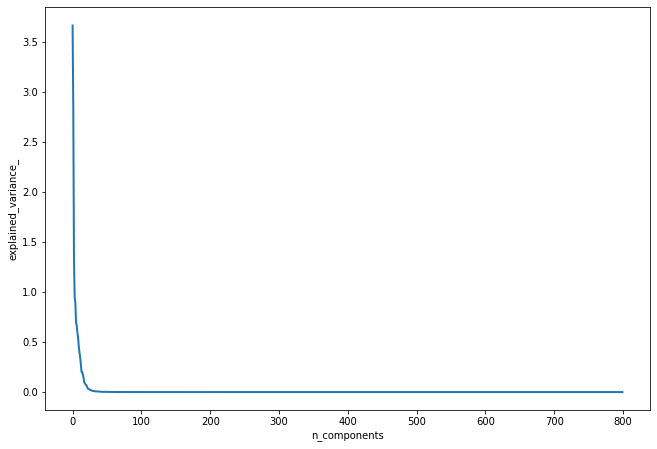

In [66]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics


# 获取数据 [49500 rows x 400 columns]
# df = pd.read_csv('1000_data.csv')
# df['x'] = df['x'].apply(eval).apply(np.array)
# df['y'] = df['y'].apply(eval)

df = data
y = df.iloc[:,0]
x = df.iloc[:,1:]
# df = data
# y = df['y']
# x = df['x']
# PCA降维
##计算全部贡献率
n_components = 800
pca = PCA(n_components=n_components)
pca.fit(x)
#print pca.explained_variance_ratio_

##PCA作图
plt.figure(1, figsize=(12, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

## 以下是训练过程

In [67]:
##根据图形取100维
x_pca = PCA(n_components = 50).fit_transform(x)
X_train, X_test = x_pca[:len(train_df)], x_pca[len(train_df):]
y_train, y_test = y[:len(train_df)], y[len(train_df):]

# # SVM (RBF)
# # using training data with 100 dimensions

# clf = svm.SVC(C = 2, probability = True)
# clf.fit(x_pca,y)

# print( 'Test Accuracy: %.2f'% clf.score(x_pca,y))

# #Create ROC curve
# pred_probas = clf.predict_proba(x_pca)[:,1] #score

# fpr,tpr,_ = metrics.roc_curve(y, pred_probas)
# roc_auc = metrics.auc(fpr,tpr)
# plt.plot(fpr, tpr, label = 'area = %.2f' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.legend(loc = 'lower right')
# plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

### 使用朴素贝叶斯

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.4533333333333333

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb.score(X_train, y_train)

In [ ]:
nb.score(X_train, y_train)

NameError: ignored

In [ ]:
nb.score(test_vect, test_lable_df["情感倾向"])

0.5568888888888889

### 使用KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_train, y_train)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
knn.score(test_vect, test_lable_df["情感倾向"])

0.48288888888888887

### 使用SVM

In [61]:
from sklearn import svm

In [68]:
clf = svm.SVC(C=0.1, probability=True, cache_size=8192)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.6780341247954081

In [69]:
clf.score(X_test, y_test)

0.557373375168086

In [70]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.66      0.73      0.69      1489
           0       0.49      0.40      0.44      1488
           1       0.50      0.55      0.53      1485

    accuracy                           0.56      4462
   macro avg       0.55      0.56      0.55      4462
weighted avg       0.55      0.56      0.55      4462



### 针对tf-idf

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vect, train_df['情感倾向'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vect)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(test_df["情感倾向"], prediction_linear, output_dict=True)
# print('positive: ', report['pos'])
# print('negative: ', report['neg'])
print(report)

Training time: 686.561199s; Prediction time: 24.878952s
{'-1': {'precision': 0.6208035222894882, 'recall': 0.752, 'f1-score': 0.6801326499849261, 'support': 1500}, '0': {'precision': 0.4148380355276907, 'recall': 0.26466666666666666, 'f1-score': 0.32315832315832316, 'support': 1500}, '1': {'precision': 0.48261877172653533, 'recall': 0.5553333333333333, 'f1-score': 0.5164290142591444, 'support': 1500}, 'accuracy': 0.524, 'macro avg': {'precision': 0.5060867765145715, 'recall': 0.524, 'f1-score': 0.5065733291341313, 'support': 4500}, 'weighted avg': {'precision': 0.5060867765145713, 'recall': 0.524, 'f1-score': 0.5065733291341312, 'support': 4500}}


## 使用LogisticRegression


In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.001, random_state=1, max_iter=10000)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6485953229748211

In [59]:
lr.score(X_test, y_test)

0.5755266696548633

In [60]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.65      0.74      0.69      1489
           0       0.54      0.46      0.49      1488
           1       0.53      0.53      0.53      1485

    accuracy                           0.58      4462
   macro avg       0.57      0.58      0.57      4462
weighted avg       0.57      0.58      0.57      4462



In [49]:
from sklearn.metrics import classification_report

## 直接使用snownlp

In [ ]:
from snownlp import SnowNLP

In [ ]:
def snownlp_sentiment(sentence):
    s = SnowNLP(sentence).sentiments
    if s < 1/3:
        return -1
    elif 1/3 < s < 2/3:
        return 0
    else:
        return 1

In [ ]:
snownlp_sentiment_result = train_df["微博中文内容"].apply(lambda x: SnowNLP(x).sentiments)

In [ ]:
SnowNLP?

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def lulala(x):
  if (x <= 0.1):
      return -1
  elif (x >= 0.9):
      return 1
  return 0

In [ ]:
snownlp_sentiment_result

0        1.000000
1        0.994194
2        0.999832
3        0.999999
4        0.996862
           ...   
44914    0.999990
44915    0.019482
44916    0.407133
44917    0.999784
44918    0.074791
Name: 微博中文内容, Length: 44919, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23481 missing from current font.
  font.set_

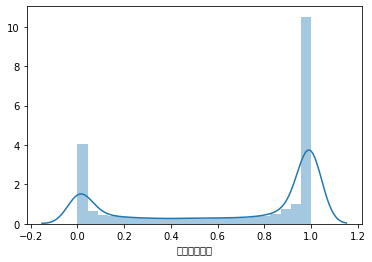

In [ ]:
sns.distplot(snownlp_sentiment_result)

## 使用snownlp训练,再进行判断

In [ ]:
sum(snownlp_sentiment_result.apply(lulala) == train_df["情感倾向"].values) / len(snownlp_sentiment_result)

0.42783677285781074

In [ ]:
sum((snownlp_sentiment_result == train_df["情感倾向"]).values) / len(snownlp_sentiment_result)

0.43875555555555557

可见效果非常差,但是也有可能是因为分割界限的问题,对于中性的评价的范围分割有问题

In [ ]:
from snownlp import seg

In [ ]:
seg.train

In [ ]:
temp = np.concatenate([train_df.jieba_cut.values, test_df.jieba_cut.values])

In [ ]:
with open('data.txt', 'w+') as f:
  for i in temp:
    f.write(" ".join(i) + "\n")

In [ ]:
seg.train('data.txt')

ValueError: ignored

In [ ]:
seg.save('seg.marshal')

## 尝试使用深度学习算法
1. `MLP`
2. `BiRNN`(`LSTM`, `GRU`)
3. `BiGRU` + `Attention`

### `MLP` 多层感知机

In [ ]:
from keras.layers import Masking
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional
from keras.models import Sequential, Model
from keras.utils.np_utils import to_categorical


In [ ]:
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
labels = to_categorical(y)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

In [ ]:
import torch

In [ ]:
class MLP(torch.nn.Module):   # 继承 torch 的 Module
    def __init__(self):
        super(MLP,self).__init__()    # 
        # 初始化三层神经网络 两个全连接的隐藏层，一个输出层
        self.fc1 = torch.nn.Linear(100,50)  # 第一个隐含层  
        self.fc2 = torch.nn.Linear(50,10)  # 第二个隐含层
        self.fc3 = torch.nn.Linear(10,3)   # 输出层
        
    def forward(self,din):
        # 前向传播， 输入值：din, 返回值 dout
        din = din.view(-1,28*28)       # 将一个多行的Tensor,拼接成一行
        dout = F.relu(self.fc1(din))   # 使用 relu 激活函数
        dout = F.relu(self.fc2(dout))
        dout = F.softmax(self.fc3(dout), dim=1)  # 输出层使用 softmax 激活函数
        # 10个数字实际上是10个类别，输出是概率分布，最后选取概率最大的作为预测值输出
        return dout

### 使用Keras CNN

In [ ]:
# 最长的句子长度是100
from keras.models import Model
from keras.preprocessing import sequence
from keras.layers import Input
from keras.layers import Dense, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb


# set parameters:
batch_size = 32
embedding_dims = 200
filters = 250
kernel_size = 3
epochs = 2

# load the dataset but only keep the top n words, zero the rest
top_words = len(vocab.keys())
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)
x_train, y_train, x_test, y_test = train_df["vocab_seq"].values, train_df["情感倾向"].values, test_df["vocab_seq"].values, test_df["情感倾向"].values
# pad dataset to a maximum review length in words
max_words = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

# Build model
sentence = Input(batch_shape=(None, max_words), dtype='int32', name='sentence')
embedding_layer = Embedding(top_words, embedding_dims, input_length=max_words)
sent_embed = embedding_layer(sentence)
conv_layer = Conv1D(filters, kernel_size, padding='valid', activation='relu')
sent_conv = conv_layer(sent_embed)
sent_pooling = GlobalMaxPooling1D()(sent_conv)
sent_repre = Dense(250)(sent_pooling)
sent_repre = Activation('relu')(sent_repre)
sent_repre = Dense(1)(sent_repre)
pred = Activation('sigmoid')(sent_repre)
model = Model(inputs=sentence, outputs=pred)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=1,validation_data=(x_test, y_test))
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 44891 samples, validate on 4474 samples
Epoch 1/2
44891/44891 [==============================] - 175s 4ms/step - loss: -5104994.9870 - accuracy: 0.3938 - val_loss: -16256369.9151 - val_accuracy: 0.3684
Epoch 2/2
44891/44891 [==============================] - 174s 4ms/step - loss: -127134993.0662 - accuracy: 0.4003 - val_loss: -190182378.7430 - val_accuracy: 0.3650
Accuracy: 36.50%


In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
vocab = model.vocab.keys()

In [ ]:
vocab = {value: index for index, value in enumerate(vocab)}

In [ ]:
# 在train中新增一列为vocab序列
train_df["vocab_seq"] = train_df.jieba_cut.apply(lambda x: [vocab[word] for word in x if word in vocab])
test_df["vocab_seq"] = test_df.jieba_cut.apply(lambda x: [vocab[word] for word in x if word in vocab])

In [ ]:
train_df = train_df[train_df["vocab_seq"].apply(len) != 0]
test_df = test_df[test_df["vocab_seq"].apply(len) != 0]

In [ ]:
## 载入数据
## 载入分词好的csv文件
train_df = pd.read_csv("./train.cnn.removed.csv")
test_df = pd.read_csv("./test.cnn.removed.csv")
train_df['vocab_seq'] = train_df["vocab_seq"].apply(eval)
test_df['vocab_seq'] = test_df["vocab_seq"].apply(eval)

In [ ]:
len(vocab.keys())

21391

In [ ]:
x_train, y_train, x_test, y_test = train_df["vocab_seq"].values, test_df["vocab_seq"].values, train_df["情感倾向"].values, test_df["情感倾向"].values


In [ ]:
model['<unk>']

### RNN LSTM

In [ ]:
length = train_df["jieba_cut"].apply(len)

In [ ]:
np.min(length)

1

In [ ]:
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


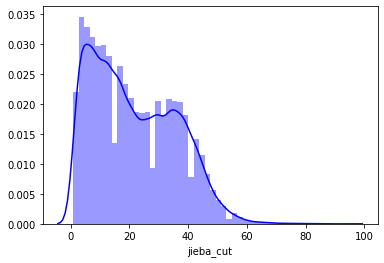

In [ ]:
sns.distplot(length, color="b")

In [71]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [98]:
vocab_size = 10000
embedding_dim = 64
max_length = 60
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [99]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df.jieba_cut.values)
word_index = tokenizer.word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

6222     [广西, 确诊, 例, 新型, 肺炎, 病例, 爸, 银行, 激活, 社保卡, 过段时间, ...
23121    [尼日利亚, 爆发, 不明, 疾病, 名, 患者, 两日, 死亡, 月, 尼日利亚政府, 警...
13705    [胖大海, 橘红, 栀子, 茶, 罗汉果, 茶, 罗汉, 黄, 栀, 茶, 金银花, 青果,...
19852    [周一, 月, 开播, 款, 修正, 消毒液, 本次, 活动, 本场, 主推, 修正, 抑菌...
1518     [预调, 震, 时, 股指, 挺, 点, 时间, 创, 指, 走势, 似, 去年, 月, 个...
                               ...                        
2533                   [黄景, 瑜, 工作室, 逆, 行者, 致敬, 英雄, 平安, 归来]
17652    [发表, 一篇, 转载, 博文, 转载, 年, 冬天, 咳嗽, O, 转载, 年, 冬天, 咳嗽]
3278     [女孩, 退票, 留, 武汉, 过年, 告诉, 家人, 战役, 全国, 面对, 新型, 肺炎...
31634    [推荐, 热点, 提出, 全国, 疫情, 总体, 呈, 下降, 趋势, 城市, 疫情, 状况...
5969     [在家, 办公, 事情, 员工工资, 计算, 复合, 发放, 安排, 网上, 教育, 培训,...
Name: jieba_cut, Length: 39528, dtype: object

In [100]:
X_train_sequences = tokenizer.texts_to_sequences(train_df.jieba_cut)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_validation_sequences = tokenizer.texts_to_sequences(test_df.jieba_cut)
X_validation_padded = pad_sequences(X_validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
index = 10 
print(train_df.jieba_cut.values[index])
print()
print(X_train_sequences[index])
print()
X_train_padded[index]

['本书', '真的', '好玩', '荒诞', '医学史', '挺好玩', '冷', '知识', '科普', '刚', '世纪', '西班牙', '医生', '烟草', '治', '癌症', '在内', '疾病', '医生', '烟草', '消毒']

[6872, 25, 5268, 1, 1, 1, 784, 1220, 996, 308, 5154, 1, 31, 7703, 482, 2872, 4603, 174, 31, 7703, 247]



array([6872,   25, 5268,    1,    1,    1,  784, 1220,  996,  308, 5154,
          1,   31, 7703,  482, 2872, 4603,  174,   31, 7703,  247,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0], dtype=int32)

In [ ]:
word_index["本书"]

6872

In [ ]:
np.unique(test_df["情感倾向"].apply(str).values)

array(['-1', '0', '1'], dtype=object)

In [ ]:
min(Y_training_cat_seq.reshape(-1))

1

In [119]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(embedding_dim),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 677,379
Trainable params: 677,379
Non-trainable params: 0
________________________________________________

In [81]:
model.compile?

In [120]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
temp1 = np.concatenate([X_train_padded, X_validation_padded])
temp2 = np.concatenate([train_df["情感倾向"], test_df["情感倾向"]]) + 1
X_train_padded, X_validation_padded, y_train, y_test = train_test_split(temp1, temp2, test_size=0.2, random_state=0)

NameError: ignored

In [118]:
import os
checkpoint_path = "training_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
num_epochs = 20
history = model.fit(X_train_padded,
                    train_df["情感倾向"]+1,
                    epochs=num_epochs,
                    batch_size=1024,
                    validation_data=(X_validation_padded, test_df["情感倾向"]+1), 
                    verbose=2,
                    callbacks=[cp_callback])

In [137]:
max_index_col = np.argmax(a, axis=1)


In [138]:
max_index_col

array([0, 0, 0, ..., 0, 2, 2])

In [ ]:
[max(x) for x in a]

In [131]:
a = model.predict(X_validation_padded)

In [140]:
loss, acc = model.evaluate(X_validation_padded, test_df["情感倾向"]+1, verbose=2)
print(classification_report(test_df["情感倾向"], max_index_col-1))

140/140 - 1s - loss: 1.4332 - accuracy: 0.5175
              precision    recall  f1-score   support

          -1       0.59      0.72      0.65      1489
           0       0.41      0.27      0.33      1488
           1       0.50      0.57      0.53      1485

    accuracy                           0.52      4462
   macro avg       0.50      0.52      0.50      4462
weighted avg       0.50      0.52      0.50      4462



In [122]:
!ls training_1

checkpoint			  cp-0005.ckpt.index
cp-0001.ckpt.data-00000-of-00001  cp-0006.ckpt.data-00000-of-00001
cp-0001.ckpt.index		  cp-0006.ckpt.index
cp-0002.ckpt.data-00000-of-00001  cp-0007.ckpt.data-00000-of-00001
cp-0002.ckpt.index		  cp-0007.ckpt.index
cp-0003.ckpt.data-00000-of-00001  cp-0008.ckpt.data-00000-of-00001
cp-0003.ckpt.index		  cp-0008.ckpt.index
cp-0004.ckpt.data-00000-of-00001  cp.ckpt.data-00000-of-00001
cp-0004.ckpt.index		  cp.ckpt.index
cp-0005.ckpt.data-00000-of-00001


In [125]:
model.load_weights("./training_1/cp-0006.ckpt.index")

Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


AssertionError: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


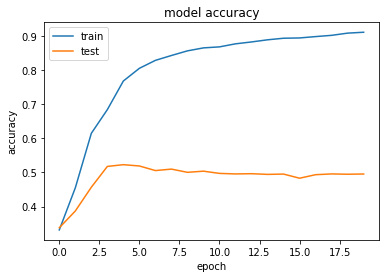

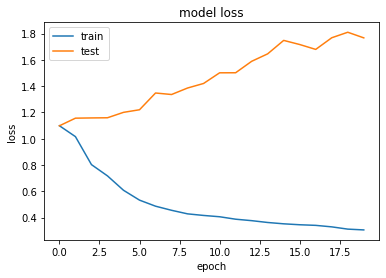

In [105]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
# summarize history for loss 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [ ]:
from  sklearn.metrics import classification_report 


In [ ]:
X_train, X_test = X[:len(train_df)], X[len(train_df):]
y_train, y_test = Y[:len(train_df)], Y[len(train_df):]

In [ ]:
temp1

NameError: ignored

In [ ]:
X_train.shape

(44919, 800)

In [ ]:
!pwd

/content


In [ ]:
np.concatenate([X_train_padded, X_validation_padded]).shape

(49410, 60)

In [ ]:
X_train_padded.shap

(44919, 60)

### 乱写

In [ ]:
x_train

NameError: ignored

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(800, activation='relu'),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
num_epochs = 20
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,
                    y_train+1,
                    epochs=num_epochs,
                    validation_data=(X_test, y_test+1), 
                    verbose=2)

Epoch 1/20
1404/1404 - 3s - loss: 0.4550 - accuracy: 0.8152 - val_loss: 1.4578 - val_accuracy: 0.5498
Epoch 2/20
1404/1404 - 3s - loss: 0.4396 - accuracy: 0.8231 - val_loss: 1.4759 - val_accuracy: 0.5237
Epoch 3/20
1404/1404 - 3s - loss: 0.4259 - accuracy: 0.8301 - val_loss: 1.4638 - val_accuracy: 0.5507
Epoch 4/20
1404/1404 - 3s - loss: 0.4111 - accuracy: 0.8382 - val_loss: 1.5366 - val_accuracy: 0.5279
Epoch 5/20
1404/1404 - 3s - loss: 0.3983 - accuracy: 0.8429 - val_loss: 1.6854 - val_accuracy: 0.5268
Epoch 6/20
1404/1404 - 3s - loss: 0.3861 - accuracy: 0.8498 - val_loss: 1.5105 - val_accuracy: 0.5275
Epoch 7/20
1404/1404 - 3s - loss: 0.3756 - accuracy: 0.8546 - val_loss: 1.6463 - val_accuracy: 0.5144
Epoch 8/20
1404/1404 - 3s - loss: 0.3618 - accuracy: 0.8624 - val_loss: 1.7341 - val_accuracy: 0.5237
Epoch 9/20
1404/1404 - 3s - loss: 0.3510 - accuracy: 0.8662 - val_loss: 1.6698 - val_accuracy: 0.5369
Epoch 10/20
1404/1404 - 3s - loss: 0.3392 - accuracy: 0.8719 - val_loss: 1.8170 - 

In [ ]:
%cd ../..

/content


In [ ]:
%cd drive/My\ Drive/疫情期间网民情绪识别

/content/drive/My Drive/疫情期间网民情绪识别


In [ ]:
cd ../mechine_learning_cjw/

/content/drive/My Drive/mechine_learning_cjw


In [ ]:
!ls

 DataFountain.ipynb
'D:\Third2\mechine learning\疫情期间网民情绪识别\sentiment.marshal.3'
 myrnn.ipynb
 RNN.ipynb
 snownlp.ipynb
 疫情期间网民情绪识别


In [ ]:
cd 疫情期间网民情绪识别

/content/drive/My Drive/mechine_learning_cjw/疫情期间网民情绪识别


In [ ]:
!ls

all_res_dep.txt  res_dep_1.txt	       snownlp_train_pre.txt  train.csv
checkpoints	 res_dep1.txt	       stopWord.txt	      trainlable.txt
neg.txt		 res_dep2.txt	       test.csv		      vectors512.txt
pos.txt		 res_dep.txt	       testdata.csv	      vectors.txt
__pycache__	 sentiment.marshal.3   test_labled.csv	      题目描述.docx
resdata.csv	 snownlp.py	       testlable.txt
res_dep0.txt	 snownlp_test_pre.txt  testoutput.txt


In [ ]:
X_train = pd.read_csv("resdata.csv")

In [ ]:
X_test = pd.read_csv("testdata.csv")
X_test = X_test.dropna(axis=0,how='any')

In [ ]:
X_test = X_test.dropna(axis=0,how='any')

In [ ]:
X_train.info

<bound method DataFrame.info of        Unnamed: 0    0       0.1  ...       509       510       511
0               0  1.0 -0.043692  ... -0.246957 -0.132966  0.141173
1               1  1.0  0.017410  ... -0.085604 -0.008279  0.119278
2               2  1.0 -0.188406  ... -0.236241 -0.096469  0.046397
3               3  1.0  0.135459  ... -0.035111  0.025478  0.075015
4               4  1.0 -0.040328  ... -0.131889 -0.046035 -0.049342
...           ...  ...       ...  ...       ...       ...       ...
44815       44815 -1.0 -0.009673  ... -0.189309 -0.070207 -0.025246
44816       44816 -1.0  0.777917  ... -0.343000 -0.190634  0.260587
44817       44817 -1.0  0.126759  ... -0.074321  0.147734  0.201043
44818       44818 -1.0  0.030822  ... -0.189055  0.090857 -0.129999
44819       44819 -1.0  0.000136  ...  0.021596 -0.307880 -0.109679

[44820 rows x 514 columns]>

In [ ]:
y = X_test.iloc[:,1]
x = X_test.iloc[:,2:]

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics

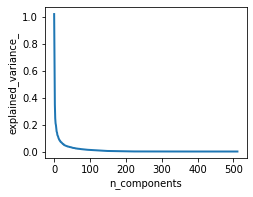

In [ ]:
n_components = 512
pca = PCA(n_components=n_components)
pca.fit(x)
#print pca.explained_variance_ratio_

##PCA作图
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()


In [ ]:
x_pca = PCA(n_components = 100).fit_transform(x)


# SVM (RBF)
# using training data with 100 dimensions

clf = svm.SVC(C = 2, probability = True)
clf.fit(x_pca,y)
print ('Train Accuracy: %.2f'% clf.score(x_pca,y))
train_predict_res=clf.predict(x_pca)
train_predict_proba=clf.res=clf.predict_proba(x_pca)

Train Accuracy: 0.81


In [ ]:
x_pca = PCA(n_components = 100).fit_transform(x)

In [ ]:
clf.score(x_pca, y)

0.33146821844225605

In [ ]:
test_result = clf.predict(x_pca)

In [ ]:
np.save("svm测试集结果.npy", test_result)

In [ ]:
!pwd

/content/drive/My Drive/mechine_learning_cjw/疫情期间网民情绪识别
